##### <font color = 'purple'> Stochastic Model to Predict the Salaries of Tech Professionals and Developers using the StackOverFlow Salary Survey Reports for 2023.

###### <font color = green> The model will be deployed into production using Gradio, and Streamlit

`Prepared by:` : `Olanrewaju Adegoke`

`Email` : `larrysman2004@yahoo.com`

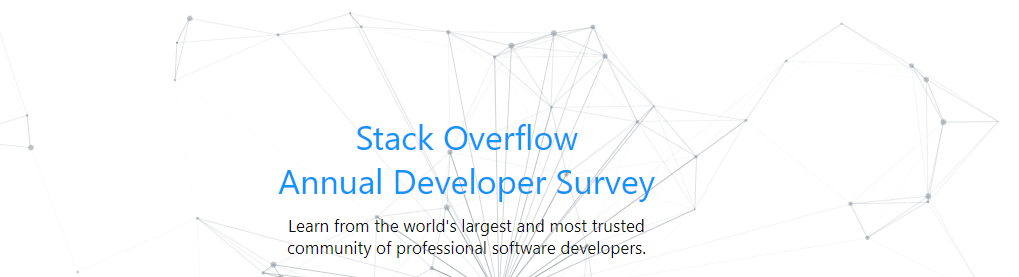

###### <font color = 'green'> Overview

Welcome to the 2023 Developer Survey! For 13 years, we've delivered industry-leading insights regarding the developer community.

This is the voice of the developer. Analysts, IT leaders, reporters, and other developers turn to this report to stay up to date with the evolving developer experience, technologies that are rising or falling in favor, and to understand where tech might be going next.

In the year 2023 survey, we went deep into AI/ML to capture how developers are thinking about it and using it in their workflows. Stack Overflow is investing heavily in enhancing the developer experience across our products, using AI and other technology, to get people to solutions fa.

###### <font color = 'green'> Detailed Exploratory Analysis and Findings

This [stackoverflow](https://survey.stackoverflow.co/2023/) provides detailed exploratory analysis and results findings. Visit the provided link to gain more undertanding on how stackoverflow provides comprehensive and detailed analysis on the survey.

###### <font color = 'green'> Project Focus
In this project, I will be focusing on building stochastic machine learning models that will predict the salaries of developers and tech professionals and productionize the models using gradio and streamlit in hosting it.   
ster

###### Import necessary libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

###### Creating the paths to project folders

In [2]:
main_path = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Stackoverflow_Salary_Project'
data_path = '../data'
model_path = '../models'
note_path = '../notebooks'
out_path = '../outputs'
vis_path = '../visuals'
res_path = '../resources'

###### Loading the dataset

In [3]:
os.chdir(data_path)
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Stackoverflow_Salary_Project\\data'

In [4]:
df = pd.read_csv('stackoverflow.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [5]:
os.chdir(note_path)

In [6]:
print(f'The dimension of the data is {df.shape} with {df.shape[0]} rows and {df.shape[1]} columns.')
print('')
df.info()

The dimension of the data is (89184, 84) with 89184 rows and 84 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert

In [7]:
df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


###### Copy the dataset

In [8]:
data = df.copy()

###### Selecting the relevant columns to support the analysis

In [9]:
cols = ['EdLevel', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType', 'Country', 'Age',
        'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
       'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith', 'AISearchHaveWorkedWith', 'AIDevHaveWorkedWith',
       'Employment', 'RemoteWork', 'OrgSize', 'WorkExp', 'Industry', 'ConvertedCompYearly']

print(f'The length of the selected columns is: {len(cols)}')
print('')
print('These columns are selected based on their importance to determining how much will a developer earn considering all the input columns.')

The length of the selected columns is: 21

These columns are selected based on their importance to determining how much will a developer earn considering all the input columns.


###### Select the dataframe using the selected columns

In [10]:
useful_df = data[cols]
useful_df.head(2)

,EdLevel,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,Country,Age,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,...,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,AISearchHaveWorkedWith,AIDevHaveWorkedWith,Employment,RemoteWork,OrgSize,WorkExp,Industry,ConvertedCompYearly
0,NaN,NaN,NaN,NaN,NaN,NaN,18-24 years old,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other,18,9,"Senior Executive (C-Suite, VP, etc.)",United States of America,25-34 years old,HTML/CSS;JavaScript;Python,Supabase,Amazon Web Services (AWS);Netlify;Vercel,...,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Vim;Visual Studio Code,ChatGPT,GitHub Copilot,"Employed, full-time",Remote,2 to 9 employees,10.0,"Information Services, IT, Software Development...",285000.0


In [11]:
useful_df.info()
print('')
print(
    'We can clearly observe that some data type are not properly in the right format and hence we need to correct this so that we can separate numerical from categorical.'
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   EdLevel                       87973 non-null  object 
 1   LearnCodeCoursesCert          37076 non-null  object 
 2   YearsCode                     87435 non-null  object 
 3   YearsCodePro                  66136 non-null  object 
 4   DevType                       76872 non-null  object 
 5   Country                       87973 non-null  object 
 6   Age                           89184 non-null  object 
 7   LanguageHaveWorkedWith        87140 non-null  object 
 8   DatabaseHaveWorkedWith        73435 non-null  object 
 9   PlatformHaveWorkedWith        63628 non-null  object 
 10  WebframeHaveWorkedWith        66938 non-null  object 
 11  ToolsTechHaveWorkedWith       77884 non-null  object 
 12  NEWCollabToolsHaveWorkedWith  85864 non-null  object 
 13  A

In [12]:
print('Suspected Numerical Columns are: [YearsCode, YearsCodePro, WorkExp, ConvertedCompYearly]\n')
print(
    'These columns are already binnarize and as such they are considerd categorical:\n'
    f'\nAge: {useful_df.Age.unique()}\n'
    f'\nOrgSize: {useful_df.OrgSize.unique()}'
)

Suspected Numerical Columns are: [YearsCode, YearsCodePro, WorkExp, ConvertedCompYearly]

These columns are already binnarize and as such they are considerd categorical:

Age: ['18-24 years old' '25-34 years old' '45-54 years old' '35-44 years old'
 'Under 18 years old' '55-64 years old' '65 years or older'
 'Prefer not to say']

OrgSize: [nan '2 to 9 employees' '5,000 to 9,999 employees' '100 to 499 employees'
 '20 to 99 employees' '1,000 to 4,999 employees' '10 to 19 employees'
 '10,000 or more employees' '500 to 999 employees'
 'Just me - I am a freelancer, sole proprietor, etc.' 'I don’t know']


###### Missing Values

In [13]:
missing_values = useful_df.isnull()
missing_values
for missing in missing_values.columns.values.tolist():
    print(missing_values[missing].value_counts())

print('\nOnly Age has no missing values.')

EdLevel
False    87973
True      1211
Name: count, dtype: int64
LearnCodeCoursesCert
True     52108
False    37076
Name: count, dtype: int64
YearsCode
False    87435
True      1749
Name: count, dtype: int64
YearsCodePro
False    66136
True     23048
Name: count, dtype: int64
DevType
False    76872
True     12312
Name: count, dtype: int64
Country
False    87973
True      1211
Name: count, dtype: int64
Age
False    89184
Name: count, dtype: int64
LanguageHaveWorkedWith
False    87140
True      2044
Name: count, dtype: int64
DatabaseHaveWorkedWith
False    73435
True     15749
Name: count, dtype: int64
PlatformHaveWorkedWith
False    63628
True     25556
Name: count, dtype: int64
WebframeHaveWorkedWith
False    66938
True     22246
Name: count, dtype: int64
ToolsTechHaveWorkedWith
False    77884
True     11300
Name: count, dtype: int64
NEWCollabToolsHaveWorkedWith
False    85864
True      3320
Name: count, dtype: int64
AISearchHaveWorkedWith
False    56328
True     32856
Name: count, dtyp

###### Selecting categorical, numerical and target columns

In [14]:
cat_cols = [
    'EdLevel', 'LearnCodeCoursesCert', 'DevType', 'Country', 'Age', 'LanguageHaveWorkedWith',
    'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith',
    'NEWCollabToolsHaveWorkedWith', 'AISearchHaveWorkedWith', 'AIDevHaveWorkedWith', 'Employment', 'RemoteWork', 'OrgSize',
    'Industry'
]

num_cols = [
    'YearsCode', 'YearsCodePro', 'WorkExp'   
]

target_col = ['ConvertedCompYearly']

###### Correcting the missing values for all the categorical columns

In [15]:
useful_df[cat_cols].isnull().sum()

EdLevel                          1211
LearnCodeCoursesCert            52108
DevType                         12312
Country                          1211
Age                                 0
LanguageHaveWorkedWith           2044
DatabaseHaveWorkedWith          15749
PlatformHaveWorkedWith          25556
WebframeHaveWorkedWith          22246
ToolsTechHaveWorkedWith         11300
NEWCollabToolsHaveWorkedWith     3320
AISearchHaveWorkedWith          32856
AIDevHaveWorkedWith             63280
Employment                       1286
RemoteWork                      15374
OrgSize                         24141
Industry                        52410
dtype: int64

In [16]:
missing_value = 'unverified'
useful_df[cat_cols] = useful_df[cat_cols].fillna(missing_value)
useful_df.head(2)

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\3022347840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df[cat_cols] = useful_df[cat_cols].fillna(missing_value)


,EdLevel,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,Country,Age,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,...,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,AISearchHaveWorkedWith,AIDevHaveWorkedWith,Employment,RemoteWork,OrgSize,WorkExp,Industry,ConvertedCompYearly
0,unverified,unverified,NaN,NaN,unverified,unverified,18-24 years old,unverified,unverified,unverified,...,unverified,unverified,unverified,unverified,unverified,unverified,unverified,NaN,unverified,NaN
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other,18,9,"Senior Executive (C-Suite, VP, etc.)",United States of America,25-34 years old,HTML/CSS;JavaScript;Python,Supabase,Amazon Web Services (AWS);Netlify;Vercel,...,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Vim;Visual Studio Code,ChatGPT,GitHub Copilot,"Employed, full-time",Remote,2 to 9 employees,10.0,"Information Services, IT, Software Development...",285000.0


In [17]:
useful_df[cat_cols].isnull().sum()

EdLevel                         0
LearnCodeCoursesCert            0
DevType                         0
Country                         0
Age                             0
LanguageHaveWorkedWith          0
DatabaseHaveWorkedWith          0
PlatformHaveWorkedWith          0
WebframeHaveWorkedWith          0
ToolsTechHaveWorkedWith         0
NEWCollabToolsHaveWorkedWith    0
AISearchHaveWorkedWith          0
AIDevHaveWorkedWith             0
Employment                      0
RemoteWork                      0
OrgSize                         0
Industry                        0
dtype: int64

### <font color = 'green'> Features Engineering

###### <font color = 'green'> Features Engineering for Categorical Columns - `cleaning and extracting important features from categorical columns`

###### `EdLevel`

In [18]:
useful_df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          36706
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       20543
Some college/university study without earning a degree                                11753
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8897
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         3887
Associate degree (A.A., A.S., etc.)                                                    2807
Primary/elementary school                                                              1905
Something else                                                                         1475
unverified                                                                             1211
Name: count, dtype: int64

###### `Educational Level Extractor function`

In [19]:
def education_level_classifier(edu):
    if 'Bachelor’s degree' in edu:
        return 'Bachelor'
    if 'Master’s degree' in edu:
        return 'Master'
    if 'Professional degree' in edu:
        return 'PhD'
    else:
        return 'below bachelor'

In [20]:
useful_df['highest_education'] = useful_df['EdLevel'].apply(education_level_classifier)
useful_df['highest_education'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\2076584668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['highest_education'] = useful_df['EdLevel'].apply(education_level_classifier)


highest_education
Bachelor          36706
below bachelor    28048
Master            20543
PhD                3887
Name: count, dtype: int64

###### `LearnCodeCoursesCert`

In [21]:
useful_df['LearnCodeCoursesCert'].value_counts().head()

LearnCodeCoursesCert
unverified           52108
Udemy                 7445
Other                 3230
Udemy;Coursera        2612
Udemy;Pluralsight     1958
Name: count, dtype: int64

In [22]:
useful_df['certifications'] = useful_df['LearnCodeCoursesCert'].apply(lambda x: x.split(';')[0])
useful_df['certifications'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\2692351111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['certifications'] = useful_df['LearnCodeCoursesCert'].apply(lambda x: x.split(';')[0])


certifications
unverified     52108
Udemy          14015
Other           7811
Codecademy      7796
edX             3266
Pluralsight     2042
Coursera        1889
Udacity          204
Skillsoft         53
Name: count, dtype: int64

In [23]:
useful_df.certifications.value_counts()

certifications
unverified     52108
Udemy          14015
Other           7811
Codecademy      7796
edX             3266
Pluralsight     2042
Coursera        1889
Udacity          204
Skillsoft         53
Name: count, dtype: int64

In [24]:
def certification_classifier(cert):
    if 'Udemy' in cert:
        return 'Udemy'
    if 'Codecademy' in cert:
        return 'Codecademy'
    if 'edX' in cert:
        return 'edX'
    if 'Pluralsight' in cert:
        return 'Pluralsight'
    if 'Coursera' in cert:
        return 'Coursera'
    else:
        return 'Others'

In [25]:
useful_df['certifications'] = useful_df.certifications.apply(certification_classifier)
useful_df.certifications.value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\1581140257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['certifications'] = useful_df.certifications.apply(certification_classifier)


certifications
Others         60176
Udemy          14015
Codecademy      7796
edX             3266
Pluralsight     2042
Coursera        1889
Name: count, dtype: int64

###### `DevType`

In [26]:
useful_df['DevType'].value_counts().head()

DevType
Developer, full-stack                            25735
Developer, back-end                              13745
unverified                                       12312
Developer, front-end                              5071
Developer, desktop or enterprise applications     3904
Name: count, dtype: int64

###### Job Type Classifier

In [27]:
def collapse_value_count(value_count_df, cutoff):
    entries_map = {}
    for i in range(len(value_count_df)):
        if value_count_df.values[i] >= cutoff:
            entries_map[value_count_df.index[i]] = value_count_df.index[i]
        else:
            entries_map[value_count_df.index[i]] = 'Others'
    return entries_map

In [28]:
value_count_df = useful_df.DevType.value_counts()
cutoff = 3900
entries_map = collapse_value_count(value_count_df, cutoff)

In [29]:
useful_df['job_type'] = useful_df['DevType'].map(entries_map)
useful_df['job_type'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\2687589022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['job_type'] = useful_df['DevType'].map(entries_map)


job_type
Others                                           28417
Developer, full-stack                            25735
Developer, back-end                              13745
unverified                                       12312
Developer, front-end                              5071
Developer, desktop or enterprise applications     3904
Name: count, dtype: int64

In [30]:
def job_type_classifier(job):
    if 'Developer, full-stack' in job:
        return 'Developer_full-stack'
    if 'Developer, back-end' in job:
        return 'Developer_back-end'
    if 'Developer, front-end' in job:
        return 'Developer_front-end'
    if 'Developer, desktop or enterprise applications' in job:
        return 'Developer_desktop'
    if 'unverified' in job:
        return 'Others'
    else:
        return job

In [31]:
useful_df['job_type'] = useful_df['job_type'].apply(job_type_classifier)
useful_df.job_type.value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\3829837775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['job_type'] = useful_df['job_type'].apply(job_type_classifier)


job_type
Others                  40729
Developer_full-stack    25735
Developer_back-end      13745
Developer_front-end      5071
Developer_desktop        3904
Name: count, dtype: int64

###### `Country`

In [32]:
useful_df['Country'].value_counts().head()

Country
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
Name: count, dtype: int64

In [33]:
def collapse_value_count(value_count_df, cutoff):
    entries_map = {}
    for i in range(len(value_count_df)):
        if value_count_df.values[i] >= cutoff:
            entries_map[value_count_df.index[i]] = value_count_df.index[i]
        else:
            entries_map[value_count_df.index[i]] = 'Others'
    return entries_map

In [34]:
value_count_df = useful_df.Country.value_counts()
cutoff = 3500
entries_map = collapse_value_count(value_count_df, cutoff)

In [35]:
useful_df['country'] = useful_df['Country'].map(entries_map)
useful_df['country'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\453728386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['country'] = useful_df['Country'].map(entries_map)


country
Others                                                  48525
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
Name: count, dtype: int64

###### Rename the long row entries name

In [36]:
def rename_row_entry(name):
    if 'United States' in name:
        return 'USA'
    if 'United Kingdom' in name:
        return 'UK'
    else:
        return name

In [37]:
useful_df['country'] = useful_df['country'].apply(rename_row_entry)
useful_df['country'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\411285167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['country'] = useful_df['country'].apply(rename_row_entry)


country
Others     48525
USA        18647
Germany     7328
India       5625
UK          5552
Canada      3507
Name: count, dtype: int64

###### `Age`

In [38]:
useful_df['Age'].value_counts()

Age
25-34 years old       33247
35-44 years old       20532
18-24 years old       17931
45-54 years old        8334
Under 18 years old     4128
55-64 years old        3392
65 years or older      1171
Prefer not to say       449
Name: count, dtype: int64

###### Age classifier

In [39]:
def age_classifier(age):
    if '25-34 years old' in age:
        return '25-34'
    if '35-44 years old' in age:
        return '35-44'
    if '18-24 years old' in age:
        return '18-24'
    if '45-54 years old' in age:
        return '45-54'
    if 'Under 18 years old' in age:
        return 'Under_18'
    if '55-64 years old' in age:
        return '55-64'
    if '65 years or older' in age:
        return 'Above_65'
    if 'Prefer not to say' in age:
        return 'Under_18'
    else:
        return age

In [40]:
useful_df['age_range'] = useful_df['Age'].apply(age_classifier)
useful_df['age_range'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\3294836245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['age_range'] = useful_df['Age'].apply(age_classifier)


age_range
25-34       33247
35-44       20532
18-24       17931
45-54        8334
Under_18     4577
55-64        3392
Above_65     1171
Name: count, dtype: int64

###### `LanguageHaveWorkedWith`

In [41]:
useful_df['LanguageHaveWorkedWith'].value_counts().head()

LanguageHaveWorkedWith
unverified                        2044
HTML/CSS;JavaScript;TypeScript    1487
Python                            1132
HTML/CSS;JavaScript                735
HTML/CSS;JavaScript;PHP;SQL        718
Name: count, dtype: int64

In [42]:
useful_df['prog_lang'] = useful_df['LanguageHaveWorkedWith'].apply(lambda lang: lang.split(';')[0])
useful_df['prog_lang'].value_counts().head()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\1626812920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['prog_lang'] = useful_df['LanguageHaveWorkedWith'].apply(lambda lang: lang.split(';')[0])


prog_lang
Bash/Shell (all shells)    24935
C#                         14077
HTML/CSS                   11945
C                           7484
Assembly                    4479
Name: count, dtype: int64

In [43]:
def collapse_value_count(value_count_df, cutoff):
    entries_map = {}
    for i in range(len(value_count_df)):
        if value_count_df.values[i] >= cutoff:
            entries_map[value_count_df.index[i]] = value_count_df.index[i]
        else:
            entries_map[value_count_df.index[i]] = 'Others'
    return entries_map

value_count_df = useful_df.prog_lang.value_counts()
cutoff = 1000
entries_map = collapse_value_count(value_count_df, cutoff)

useful_df['prog_lang'] = useful_df['prog_lang'].map(entries_map)
useful_df['prog_lang'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\2437163085.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['prog_lang'] = useful_df['prog_lang'].map(entries_map)


prog_lang
Bash/Shell (all shells)    24935
C#                         14077
HTML/CSS                   11945
C                           7484
Others                      6327
Assembly                    4479
C++                         3499
Java                        3463
JavaScript                  3167
Go                          2686
Python                      2360
unverified                  2044
Dart                        1683
Delphi                      1035
Name: count, dtype: int64

In [44]:
def prog_lang_classifier(lang):
    if 'Bash/Shell (all shells)' in lang:
        return 'Bash/Shell'
    if 'C#' in lang:
        return 'C#'
    if 'HTML/CSS' in lang:
        return 'HTML/CSS'
    if 'C' in lang:
        return 'C'
    if 'Assembly' in lang:
        return 'Assembly'
    if 'C++' in lang:
        return 'C++'
    if 'Java' in lang:
        return 'Java'
    if 'JavaScript' in lang:
        return 'JavaScript'
    if 'Go' in lang:
        return 'Go'
    if 'Python' in lang:
        return 'Python'
    if 'Dart' in lang:
        return 'Dart'
    if 'Delphi' in lang:
        return 'Delphi'
    if 'Others' in lang:
        return 'Others'
    if 'unverified' in lang:
        return 'Others'
    else:
        return lang

In [45]:
useful_df['prog_lang'] = useful_df['prog_lang'].apply(prog_lang_classifier)
useful_df['prog_lang'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\2112751817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['prog_lang'] = useful_df['prog_lang'].apply(prog_lang_classifier)


prog_lang
Bash/Shell    24935
C#            14077
HTML/CSS      11945
C             10983
Others         8371
Java           6630
Assembly       4479
Go             2686
Python         2360
Dart           1683
Delphi         1035
Name: count, dtype: int64

###### `DatabaseHaveWorkedWith`

In [46]:
useful_df['DatabaseHaveWorkedWith'].value_counts().head()

DatabaseHaveWorkedWith
unverified              15749
PostgreSQL               4350
Microsoft SQL Server     3322
MySQL                    3116
SQLite                   2299
Name: count, dtype: int64

In [47]:
useful_df['database'] = useful_df['DatabaseHaveWorkedWith'].apply(lambda database: database.split(';')[0])
useful_df['database'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\1059137436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['database'] = useful_df['DatabaseHaveWorkedWith'].apply(lambda database: database.split(';')[0])


database
unverified                    15749
Microsoft SQL Server           9200
PostgreSQL                     7602
MySQL                          7246
MariaDB                        7181
MongoDB                        6364
Elasticsearch                  5584
Dynamodb                       4958
Cloud Firestore                4153
BigQuery                       3456
SQLite                         2314
Cosmos DB                      2205
Firebase Realtime Database     2103
Cassandra                      1621
Microsoft Access               1448
H2                             1416
Oracle                         1268
Firebird                        862
InfluxDB                        822
IBM DB2                         681
Clickhouse                      620
Couch DB                        535
Cockroachdb                     472
Couchbase                       300
Redis                           254
DuckDB                          243
Neo4J                           148
Datomic            

In [48]:
def collapse_value_count(value_count_df, cutoff):
    entries_map = {}
    for i in range(len(value_count_df)):
        if value_count_df.values[i] >= cutoff:
            entries_map[value_count_df.index[i]] = value_count_df.index[i]
        else:
            entries_map[value_count_df.index[i]] = 'Others'
    return entries_map

value_count_df = useful_df.database.value_counts()
cutoff = 1000
entries_map = collapse_value_count(value_count_df, cutoff)

useful_df['database'] = useful_df['database'].map(entries_map)
useful_df['database'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\1912123969.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['database'] = useful_df['database'].map(entries_map)


database
unverified                    15749
Microsoft SQL Server           9200
PostgreSQL                     7602
MySQL                          7246
MariaDB                        7181
MongoDB                        6364
Elasticsearch                  5584
Others                         5316
Dynamodb                       4958
Cloud Firestore                4153
BigQuery                       3456
SQLite                         2314
Cosmos DB                      2205
Firebase Realtime Database     2103
Cassandra                      1621
Microsoft Access               1448
H2                             1416
Oracle                         1268
Name: count, dtype: int64

In [49]:
def database_classifier(database):
    if 'unverified' in database:
        return 'Others'
    if 'Others' in database:
        return 'Others'
    else:
        return database

useful_df['database'] = useful_df['database'].apply(database_classifier)
useful_df['database'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\1752166184.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['database'] = useful_df['database'].apply(database_classifier)


database
Others                        21065
Microsoft SQL Server           9200
PostgreSQL                     7602
MySQL                          7246
MariaDB                        7181
MongoDB                        6364
Elasticsearch                  5584
Dynamodb                       4958
Cloud Firestore                4153
BigQuery                       3456
SQLite                         2314
Cosmos DB                      2205
Firebase Realtime Database     2103
Cassandra                      1621
Microsoft Access               1448
H2                             1416
Oracle                         1268
Name: count, dtype: int64

###### `PlatformHaveWorkedWith`

In [50]:
useful_df['PlatformHaveWorkedWith'].value_counts()

PlatformHaveWorkedWith
unverified                                                                                                                                           25556
Amazon Web Services (AWS)                                                                                                                             9804
Microsoft Azure                                                                                                                                       5945
Google Cloud                                                                                                                                          2495
Amazon Web Services (AWS);Microsoft Azure                                                                                                             2192
                                                                                                                                                     ...  
Digital Ocean;IBM Cloud Or Watson;OVH;Vercel   

In [51]:
useful_df['cloud_platform'] = useful_df['PlatformHaveWorkedWith'].apply(lambda platform: platform.split(';')[0])
useful_df['cloud_platform'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\1883804697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['cloud_platform'] = useful_df['PlatformHaveWorkedWith'].apply(lambda platform: platform.split(';')[0])


cloud_platform
Amazon Web Services (AWS)            33818
unverified                           25556
Microsoft Azure                       6764
Google Cloud                          4250
Firebase                              4121
Cloudflare                            4114
Digital Ocean                         2818
Heroku                                1572
VMware                                 803
Hetzner                                774
Netlify                                743
Managed Hosting                        615
Vercel                                 545
Linode, now Akamai                     456
Oracle Cloud Infrastructure (OCI)      419
OpenShift                              358
OVH                                    343
Fly.io                                 335
OpenStack                              177
Colocation                             167
Vultr                                  149
IBM Cloud Or Watson                    135
Render                                 

In [52]:
def cloud_platform_classifier(cloud):
    if 'Amazon Web Services (AWS)' in cloud:
        return 'Amazon Web Services (AWS)'
    if 'Microsoft Azure' in cloud:
        return 'Microsoft Azure'
    if 'Google Cloud' in cloud:
        return 'Google Cloud'
    if 'Firebase' in cloud:
        return 'Firebase'
    else:
        return 'Others'

useful_df['cloud_platform'] = useful_df['cloud_platform'].apply(cloud_platform_classifier)
useful_df['cloud_platform'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\681976606.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['cloud_platform'] = useful_df['cloud_platform'].apply(cloud_platform_classifier)


cloud_platform
Others                       40231
Amazon Web Services (AWS)    33818
Microsoft Azure               6764
Google Cloud                  4250
Firebase                      4121
Name: count, dtype: int64

###### `WebframeHaveWorkedWith`

In [53]:
useful_df['WebframeHaveWorkedWith'].value_counts()

WebframeHaveWorkedWith
unverified                                                                    22246
React                                                                          2017
Spring Boot                                                                    1479
Node.js                                                                        1452
Node.js;React                                                                  1161
                                                                              ...  
ASP.NET;ASP.NET CORE;Express;Flask;jQuery;Spring Boot                             1
Angular;Django;Express;Flask;Next.js;Node.js;React;Svelte;Vue.js                  1
Blazor;Deno;Solid.js                                                              1
Nuxt.js;React;Ruby on Rails;Svelte;Vue.js                                         1
Angular;AngularJS;Express;jQuery;Node.js;Nuxt.js;Spring Boot;Svelte;Vue.js        1
Name: count, Length: 15145, dtype: int64

In [54]:
useful_df['webframe'] = useful_df['WebframeHaveWorkedWith'].apply(lambda webframe: webframe.split(';')[0])
useful_df['webframe'].value_counts().head()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\3719155657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['webframe'] = useful_df['WebframeHaveWorkedWith'].apply(lambda webframe: webframe.split(';')[0])


webframe
unverified    22246
Angular       12537
Express        7279
Django         5766
ASP.NET        5689
Name: count, dtype: int64

In [55]:
def webframe_classifier(webframe):
    if 'Angular' in webframe:
        return 'Angular'
    if 'Express' in webframe:
        return 'Express'
    if 'Django' in webframe:
        return 'Django'
    if 'ASP.NET' in webframe:
        return 'ASP.NET'
    else:
        return 'Others'

useful_df['webframe'] = useful_df['webframe'].apply(webframe_classifier)
useful_df['webframe'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\3616855627.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['webframe'] = useful_df['webframe'].apply(webframe_classifier)


webframe
Others     52397
Angular    14580
ASP.NET     9162
Express     7279
Django      5766
Name: count, dtype: int64

###### `ToolsTechHaveWorkedWith`

In [56]:
useful_df['ToolsTechHaveWorkedWith'].value_counts()

ToolsTechHaveWorkedWith
unverified                                                                   11300
Visual Studio Solution                                                        1264
Docker                                                                        1200
npm                                                                           1166
Pip                                                                            935
                                                                             ...  
Ansible;Cargo;Docker;Homebrew;Kubernetes;Make;Pip;SCons;Terraform                1
Ansible;Docker;GNU GCC;Homebrew;Kubernetes;Make;Pip;Puppet;Terraform;Yarn        1
Ansible;Ant;Chef;Chocolatey;Docker;Gradle;Kubernetes;npm;Pip;Puppet;Yarn         1
Ant;Gradle;Make;MSBuild;MSVC                                                     1
Docker;Kubernetes;npm;Podman;Vite                                                1
Name: count, Length: 33134, dtype: int64

In [57]:
useful_df['tech_tool'] = useful_df['ToolsTechHaveWorkedWith'].apply(lambda tech_tool: tech_tool.split(';')[0])
useful_df['tech_tool'].value_counts().head()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\1560618299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['tech_tool'] = useful_df['ToolsTechHaveWorkedWith'].apply(lambda tech_tool: tech_tool.split(';')[0])


tech_tool
Docker        20000
unverified    11300
Cargo          7426
Ansible        6921
npm            5403
Name: count, dtype: int64

In [58]:
def tech_tool_classifier(tool):
    if 'Docker' in tool:
        return 'Docker'
    if 'Cargo' in tool:
        return 'Cargo'
    if 'Ansible' in tool:
        return 'Ansible'
    if 'npm' in tool:
        return 'npm'
    else:
        return 'Others'

useful_df['tech_tool'] = useful_df['tech_tool'].apply(tech_tool_classifier)
useful_df['tech_tool'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\2310987147.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['tech_tool'] = useful_df['tech_tool'].apply(tech_tool_classifier)


tech_tool
Others     49328
Docker     20000
Cargo       7426
Ansible     6921
npm         5509
Name: count, dtype: int64

###### `NEWCollabToolsHaveWorkedWith`

In [59]:
useful_df['NEWCollabToolsHaveWorkedWith'].value_counts()

NEWCollabToolsHaveWorkedWith
Visual Studio Code                                                                                                                                  8754
Visual Studio;Visual Studio Code                                                                                                                    3430
unverified                                                                                                                                          3320
Notepad++;Visual Studio;Visual Studio Code                                                                                                          2167
IntelliJ IDEA;Visual Studio Code                                                                                                                    1654
                                                                                                                                                    ... 
Android Studio;DataGrip;IntelliJ IDEA;Jupyter Noteboo

In [60]:
useful_df['collab_tool'] = useful_df['NEWCollabToolsHaveWorkedWith'].apply(lambda collab: collab.split(';')[0])
useful_df['collab_tool'].value_counts().head()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\4185806142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['collab_tool'] = useful_df['NEWCollabToolsHaveWorkedWith'].apply(lambda collab: collab.split(';')[0])


collab_tool
Android Studio        14553
IntelliJ IDEA         10038
Visual Studio Code     9691
Notepad++              6744
Visual Studio          4596
Name: count, dtype: int64

In [61]:
def collab_tool_classifier(collab):
    if 'Android Studio' in collab:
        return 'Android Studio'
    if 'IntelliJ IDEA' in collab:
        return 'IntelliJ IDEA'
    if 'Visual Studio Code' in collab:
        return 'Visual Studio Code'
    if 'Notepad++' in collab:
        return 'Notepad++'
    if 'Visual Studio' in collab:
        return 'Visual Studio'
    else:
        return 'Others'

useful_df['collab_tool'] = useful_df['collab_tool'].apply(collab_tool_classifier)
useful_df['collab_tool'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\2000145653.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['collab_tool'] = useful_df['collab_tool'].apply(collab_tool_classifier)


collab_tool
Others                43562
Android Studio        14553
IntelliJ IDEA         10038
Visual Studio Code     9691
Notepad++              6744
Visual Studio          4596
Name: count, dtype: int64

###### `AISearchHaveWorkedWith`

In [62]:
useful_df['AISearchHaveWorkedWith'].value_counts()

AISearchHaveWorkedWith
unverified                                                         32856
ChatGPT                                                            32150
Bing AI;ChatGPT                                                     6537
ChatGPT;WolframAlpha                                                3855
ChatGPT;Google Bard AI                                              2274
                                                                   ...  
ChatGPT;Google Bard AI;Neeva AI;WolframAlpha;You.com                   1
Neeva AI;Phind                                                         1
Bing AI;ChatGPT;Google Bard AI;Neeva AI;Phind;Quora Poe;You.com        1
Andi;ChatGPT;Google Bard AI;Neeva AI;Phind                             1
Bing AI;ChatGPT;Google Bard AI;Metaphor;Neeva AI;WolframAlpha          1
Name: count, Length: 324, dtype: int64

In [63]:
useful_df['aisearchtool'] = useful_df['AISearchHaveWorkedWith'].apply(lambda aisearch: aisearch.split(';')[0])
useful_df['aisearchtool'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\2796774567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['aisearchtool'] = useful_df['AISearchHaveWorkedWith'].apply(lambda aisearch: aisearch.split(';')[0])


aisearchtool
ChatGPT           40830
unverified        32856
Bing AI           12884
WolframAlpha       1685
Google Bard AI      310
Andi                193
Phind               190
You.com              99
Quora Poe            52
Perplexity AI        42
Neeva AI             31
Metaphor             12
Name: count, dtype: int64

In [64]:
def aisearch_tool_classifier(ai):
    if 'ChatGPT' in ai:
        return 'ChatGPT'
    if 'Bing AI' in ai:
        return 'Bing_AI'
    if 'WolframAlpha' in ai:
        return 'Wolfram_Alpha'
    if 'Google Bard AI' in ai:
        return 'Google_Bard_AI'
    else:
        return 'Others'

useful_df['aisearchtool'] = useful_df['aisearchtool'].apply(aisearch_tool_classifier)
useful_df['aisearchtool'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\2922447271.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['aisearchtool'] = useful_df['aisearchtool'].apply(aisearch_tool_classifier)


aisearchtool
ChatGPT           40830
Others            33475
Bing_AI           12884
Wolfram_Alpha      1685
Google_Bard_AI      310
Name: count, dtype: int64

###### `AIDevHaveWorkedWith`

In [65]:
useful_df['AIDevHaveWorkedWith'].value_counts()

AIDevHaveWorkedWith
unverified                                                             63280
GitHub Copilot                                                         17754
GitHub Copilot;Tabnine                                                  2248
Tabnine                                                                 2160
AWS CodeWhisperer;GitHub Copilot                                         813
                                                                       ...  
AWS CodeWhisperer;Mintlify;Replit Ghostwriter;Synk Code;Tabnine            1
AWS CodeWhisperer;GitHub Copilot;Rubber Duck.AI;Synk Code;Whispr AI        1
Adrenaline;GitHub Copilot;Mintlify;Synk Code;Tabnine;Whispr AI             1
Replit Ghostwriter;Synk Code;Tabnine;Whispr AI                             1
AWS CodeWhisperer;Codeium;GitHub Copilot;Mintlify;Tabnine                  1
Name: count, Length: 167, dtype: int64

In [66]:
useful_df['aidevtool'] = useful_df['AIDevHaveWorkedWith'].apply(lambda aidev: aidev.split(';')[0])
useful_df['aidevtool'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\2976083303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['aidevtool'] = useful_df['AIDevHaveWorkedWith'].apply(lambda aidev: aidev.split(';')[0])


aidevtool
unverified            63280
GitHub Copilot        20611
Tabnine                2173
AWS CodeWhisperer      2010
Codeium                 411
Synk Code               214
Adrenaline              174
Whispr AI               135
Mintlify                 78
Replit Ghostwriter       71
Rubber Duck.AI           27
Name: count, dtype: int64

In [67]:
def aidev_tool_classifier(dev):
    if 'GitHub Copilot' in dev:
        return 'GitHub Copilot'
    if 'Tabnine' in dev:
        return 'Tabnine'
    if 'AWS CodeWhisperer' in dev:
        return 'AWS CodeWhisperer'
    else:
        return 'Others'

useful_df['aidevtool'] = useful_df['aidevtool'].apply(aidev_tool_classifier)
useful_df['aidevtool'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\4163791659.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['aidevtool'] = useful_df['aidevtool'].apply(aidev_tool_classifier)


aidevtool
Others               64390
GitHub Copilot       20611
Tabnine               2173
AWS CodeWhisperer     2010
Name: count, dtype: int64

###### `Employment`

In [68]:
useful_df['Employment'].value_counts()

Employment
Employed, full-time                                                                                                                                                                                             53748
Student, full-time                                                                                                                                                                                               7430
Independent contractor, freelancer, or self-employed                                                                                                                                                             7076
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                         4354
Not employed, but looking for work                                                                                                   

In [69]:
useful_df['employment_status'] = useful_df['Employment'].apply(lambda emp: emp.split(';')[0])
useful_df['employment_status'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\734024438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['employment_status'] = useful_df['Employment'].apply(lambda emp: emp.split(';')[0])


employment_status
Employed, full-time                                     60899
Student, full-time                                       9157
Independent contractor, freelancer, or self-employed     9137
Not employed, but looking for work                       3543
Employed, part-time                                      2364
unverified                                               1286
Not employed, and not looking for work                    844
Student, part-time                                        811
Retired                                                   594
I prefer not to say                                       549
Name: count, dtype: int64

In [70]:
def employment_classifier(emp):
    if 'Employed, full-time' in emp:
        return 'Employed, full-time'
    if 'Employed, part-time' in emp:
        return 'Employed, part-time'
    if 'Student, full-time' in emp:
        return 'Student, full-time'
    if 'Student, part-time' in emp:
        return 'Student, part-time'
    if 'Independent contractor, freelancer, or self-employed' in emp:
        return 'Independent'
    else:
        return 'Others'

useful_df['employment_status'] = useful_df['employment_status'].apply(employment_classifier)
useful_df['employment_status'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\3065411528.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['employment_status'] = useful_df['employment_status'].apply(employment_classifier)


employment_status
Employed, full-time    60899
Student, full-time      9157
Independent             9137
Others                  6816
Employed, part-time     2364
Student, part-time       811
Name: count, dtype: int64

###### `RemoteWork`

In [71]:
useful_df['RemoteWork'].value_counts()

RemoteWork
Hybrid (some remote, some in-person)    31131
Remote                                  30566
unverified                              15374
In-person                               12113
Name: count, dtype: int64

In [72]:
print(useful_df['RemoteWork'].value_counts().idxmax())
print('\nSince Hybrid occurs most, I will be adding the unverified to Hybrid to have the three possible working options.')

Hybrid (some remote, some in-person)

Since Hybrid occurs most, I will be adding the unverified to Hybrid to have the three possible working options.


In [73]:
def work_option_classifier(work):
    if 'Hybrid (some remote, some in-person)' in work:
        return 'Hybrid'
    if 'unverified' in work:
        return 'Hybrid'
    else:
        return work

useful_df['work_option'] = useful_df['RemoteWork'].apply(work_option_classifier)
useful_df['work_option'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\619515628.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['work_option'] = useful_df['RemoteWork'].apply(work_option_classifier)


work_option
Hybrid       46505
Remote       30566
In-person    12113
Name: count, dtype: int64

###### `OrgSize`

In [74]:
useful_df['OrgSize'].value_counts()

OrgSize
unverified                                            24141
20 to 99 employees                                    13380
100 to 499 employees                                  12218
10,000 or more employees                               7929
1,000 to 4,999 employees                               7235
2 to 9 employees                                       6439
10 to 19 employees                                     5254
500 to 999 employees                                   4472
Just me - I am a freelancer, sole proprietor, etc.     4196
5,000 to 9,999 employees                               2677
I don’t know                                           1243
Name: count, dtype: int64

In [75]:
def company_size_classifier(size):
    if 'unverified' in size:
        return '20 to 99 employees'
    if 'I don’t know' in size:
        return '20 to 99 employees'
    if 'Just me - I am a freelancer, sole proprietor, etc.' in size:
        return 'Independent'
    else:
        return size

In [76]:
useful_df['org_size'] = useful_df['OrgSize'].apply(company_size_classifier)
useful_df['org_size'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\3743789541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['org_size'] = useful_df['OrgSize'].apply(company_size_classifier)


org_size
20 to 99 employees          38764
100 to 499 employees        12218
10,000 or more employees     7929
1,000 to 4,999 employees     7235
2 to 9 employees             6439
10 to 19 employees           5254
500 to 999 employees         4472
Independent                  4196
5,000 to 9,999 employees     2677
Name: count, dtype: int64

###### `Industry`

In [77]:
useful_df['Industry'].value_counts()

Industry
unverified                                                             52410
Information Services, IT, Software Development, or other Technology    18159
Financial Services                                                      4421
Other                                                                   4011
Manufacturing, Transportation, or Supply Chain                          2607
Healthcare                                                              2216
Retail and Consumer Services                                            1955
Higher Education                                                        1242
Advertising Services                                                     786
Insurance                                                                707
Oil & Gas                                                                276
Legal Services                                                           210
Wholesale                                                          

In [78]:
def industry_classifier(ind):
    if 'unverified' in ind:
        return 'Other'
    else:
        return ind

In [79]:
useful_df['industry'] = useful_df['Industry'].apply(industry_classifier)
useful_df['industry'].value_counts()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\693147531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['industry'] = useful_df['Industry'].apply(industry_classifier)


industry
Other                                                                  56421
Information Services, IT, Software Development, or other Technology    18159
Financial Services                                                      4421
Manufacturing, Transportation, or Supply Chain                          2607
Healthcare                                                              2216
Retail and Consumer Services                                            1955
Higher Education                                                        1242
Advertising Services                                                     786
Insurance                                                                707
Oil & Gas                                                                276
Legal Services                                                           210
Wholesale                                                                184
Name: count, dtype: int64

In [80]:
useful_df.columns

Index(['EdLevel', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro',
       'DevType', 'Country', 'Age', 'LanguageHaveWorkedWith',
       'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
       'WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith',
       'NEWCollabToolsHaveWorkedWith', 'AISearchHaveWorkedWith',
       'AIDevHaveWorkedWith', 'Employment', 'RemoteWork', 'OrgSize', 'WorkExp',
       'Industry', 'ConvertedCompYearly', 'highest_education',
       'certifications', 'job_type', 'country', 'age_range', 'prog_lang',
       'database', 'cloud_platform', 'webframe', 'tech_tool', 'collab_tool',
       'aisearchtool', 'aidevtool', 'employment_status', 'work_option',
       'org_size', 'industry'],
      dtype='object')

###### <font color = 'green'> Features Engineering for Numerical Columns

In [81]:
num_cols

['YearsCode', 'YearsCodePro', 'WorkExp']

###### `YearsCode`

In [82]:
useful_df['YearsCode'].value_counts()
print(type(useful_df['YearsCode'].iloc[0]))
print(type(useful_df['YearsCode'].iloc[1]))
print('')
print('The YearsCode is the number of years you have been coding and should be numerical. It contains missing values and we need to convert to numerical.')

<class 'float'>
<class 'str'>

The YearsCode is the number of years you have been coding and should be numerical. It contains missing values and we need to convert to numerical.


In [83]:
useful_df['YearsCode'].unique()

array([nan, '18', '27', '12', '6', '21', '4', '5', '20', '14', '10', '15',
       '11', '3', '24', '8', '13', 'Less than 1 year', '16', '33', '22',
       '30', '32', '7', '35', '28', '40', '17', '29', '19',
       'More than 50 years', '9', '38', '26', '34', '25', '2', '45', '23',
       '31', '43', '1', '48', '41', '50', '39', '42', '37', '36', '44',
       '46', '49', '47'], dtype=object)

In [84]:
def yearsofcoding(year):
    if year == 'Less than 1 year':
        return float(0.5)
    if year == 'More than 50 years':
        return float(51)
    else:
        return float(year)

In [85]:
useful_df['years_of_coding'] = useful_df['YearsCode'].apply(yearsofcoding)
useful_df['years_of_coding'].unique()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\1705049865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['years_of_coding'] = useful_df['YearsCode'].apply(yearsofcoding)


array([ nan, 18. , 27. , 12. ,  6. , 21. ,  4. ,  5. , 20. , 14. , 10. ,
       15. , 11. ,  3. , 24. ,  8. , 13. ,  0.5, 16. , 33. , 22. , 30. ,
       32. ,  7. , 35. , 28. , 40. , 17. , 29. , 19. , 51. ,  9. , 38. ,
       26. , 34. , 25. ,  2. , 45. , 23. , 31. , 43. ,  1. , 48. , 41. ,
       50. , 39. , 42. , 37. , 36. , 44. , 46. , 49. , 47. ])

###### Correcting the missing values - using the mean strategy

In [86]:
avg_year_of_coding = round(useful_df['years_of_coding'].astype('float').mean(axis=0), 0)
print(f'The average years of coding is {avg_year_of_coding}')

The average years of coding is 14.0


In [87]:
useful_df['years_of_coding'] = useful_df['years_of_coding'].replace(np.nan, avg_year_of_coding)
useful_df['years_of_coding'].unique()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\854737711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['years_of_coding'] = useful_df['years_of_coding'].replace(np.nan, avg_year_of_coding)


array([14. , 18. , 27. , 12. ,  6. , 21. ,  4. ,  5. , 20. , 10. , 15. ,
       11. ,  3. , 24. ,  8. , 13. ,  0.5, 16. , 33. , 22. , 30. , 32. ,
        7. , 35. , 28. , 40. , 17. , 29. , 19. , 51. ,  9. , 38. , 26. ,
       34. , 25. ,  2. , 45. , 23. , 31. , 43. ,  1. , 48. , 41. , 50. ,
       39. , 42. , 37. , 36. , 44. , 46. , 49. , 47. ])

###### `YearsCodePro`

In [88]:
useful_df['YearsCodePro'].value_counts()
print(type(useful_df['YearsCodePro'].iloc[0]))
print(type(useful_df['YearsCodePro'].iloc[1]))
print('')
print('The YearsCodePro is the number of professional years of coding and should be numerical. It contains missing values and we need to convert to numerical.')

<class 'float'>
<class 'str'>

The YearsCodePro is the number of professional years of coding and should be numerical. It contains missing values and we need to convert to numerical.


In [89]:
useful_df['YearsCodePro'].unique()

array([nan, '9', '23', '7', '4', '21', '3', '15', 'Less than 1 year',
       '10', '2', '6', '14', '5', '19', '13', '16', '28', '1', '30', '11',
       '8', '25', '32', '24', '40', '17', '45', '29', '12', '31', '20',
       '18', '50', '27', '43', '22', '26', '38', '33', '44', '35', '34',
       '37', '42', '41', 'More than 50 years', '47', '36', '39', '48',
       '46', '49'], dtype=object)

In [90]:
def years_of_professional_coding(year):
    if year == 'Less than 1 year':
        return float(0.5)
    if year == 'More than 50 years':
        return float(51)
    else:
        return float(year)

useful_df['years_of_pro_coding'] = useful_df['YearsCodePro'].apply(years_of_professional_coding)
useful_df['years_of_pro_coding'].unique()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\307192303.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['years_of_pro_coding'] = useful_df['YearsCodePro'].apply(years_of_professional_coding)


array([ nan,  9. , 23. ,  7. ,  4. , 21. ,  3. , 15. ,  0.5, 10. ,  2. ,
        6. , 14. ,  5. , 19. , 13. , 16. , 28. ,  1. , 30. , 11. ,  8. ,
       25. , 32. , 24. , 40. , 17. , 45. , 29. , 12. , 31. , 20. , 18. ,
       50. , 27. , 43. , 22. , 26. , 38. , 33. , 44. , 35. , 34. , 37. ,
       42. , 41. , 51. , 47. , 36. , 39. , 48. , 46. , 49. ])

###### Correcting the missing values - using the mean strategy

In [91]:
avg_year_of_pro_coding = round(useful_df['years_of_pro_coding'].astype('float').mean(axis=0), 0)
print(f'The average years of professional coding is {avg_year_of_pro_coding}')

The average years of professional coding is 11.0


In [92]:
useful_df['years_of_pro_coding'] = useful_df['years_of_pro_coding'].replace(np.nan, avg_year_of_pro_coding)
useful_df['years_of_pro_coding'].unique()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\1269103095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['years_of_pro_coding'] = useful_df['years_of_pro_coding'].replace(np.nan, avg_year_of_pro_coding)


array([11. ,  9. , 23. ,  7. ,  4. , 21. ,  3. , 15. ,  0.5, 10. ,  2. ,
        6. , 14. ,  5. , 19. , 13. , 16. , 28. ,  1. , 30. ,  8. , 25. ,
       32. , 24. , 40. , 17. , 45. , 29. , 12. , 31. , 20. , 18. , 50. ,
       27. , 43. , 22. , 26. , 38. , 33. , 44. , 35. , 34. , 37. , 42. ,
       41. , 51. , 47. , 36. , 39. , 48. , 46. , 49. ])

###### `WorkExp`

In [93]:
useful_df['WorkExp'].value_counts()
print(type(useful_df['WorkExp'].iloc[0]))
print(type(useful_df['WorkExp'].iloc[1]))

<class 'numpy.float64'>
<class 'numpy.float64'>


In [94]:
useful_df['WorkExp'].unique()

array([nan, 10., 23.,  7.,  6., 22.,  4.,  5.,  3.,  9., 15., 14., 18.,
       13., 39.,  2., 28., 12., 17., 25., 11., 16., 30., 20., 24., 19.,
        1.,  8., 26., 38., 27., 32., 21., 40.,  0., 34., 35., 29., 33.,
       37., 36., 31., 48., 45., 42., 43., 44., 50., 41., 46., 47., 49.])

In [95]:
useful_df['WorkExp'].isnull().sum()

45605

###### Correcting the missing values - using the mean strategy

In [96]:
avg_work_exp = round(useful_df['WorkExp'].astype('float').mean(axis=0), 0)
print(f'The average years of experience is {avg_work_exp}')

The average years of experience is 11.0


In [97]:
useful_df['years_of_work_exp'] = useful_df['WorkExp'].replace(np.nan, avg_work_exp)
useful_df['years_of_work_exp'].unique()

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_17452\3298303972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df['years_of_work_exp'] = useful_df['WorkExp'].replace(np.nan, avg_work_exp)


array([11., 10., 23.,  7.,  6., 22.,  4.,  5.,  3.,  9., 15., 14., 18.,
       13., 39.,  2., 28., 12., 17., 25., 16., 30., 20., 24., 19.,  1.,
        8., 26., 38., 27., 32., 21., 40.,  0., 34., 35., 29., 33., 37.,
       36., 31., 48., 45., 42., 43., 44., 50., 41., 46., 47., 49.])

###### The completed dataframe

In [98]:
useful_df.head(2)

,EdLevel,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,Country,Age,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,...,collab_tool,aisearchtool,aidevtool,employment_status,work_option,org_size,industry,years_of_coding,years_of_pro_coding,years_of_work_exp
0,unverified,unverified,NaN,NaN,unverified,unverified,18-24 years old,unverified,unverified,unverified,...,Others,Others,Others,Others,Hybrid,20 to 99 employees,Other,14.0,11.0,11.0
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other,18,9,"Senior Executive (C-Suite, VP, etc.)",United States of America,25-34 years old,HTML/CSS;JavaScript;Python,Supabase,Amazon Web Services (AWS);Netlify;Vercel,...,Others,ChatGPT,GitHub Copilot,"Employed, full-time",Remote,2 to 9 employees,"Information Services, IT, Software Development...",18.0,9.0,10.0


###### Drop all unwanted columns in the dataframe

###### Drop categorical unwanted columns

In [99]:
useful_df = useful_df.drop(columns=cat_cols)
useful_df.head(2)

,YearsCode,YearsCodePro,WorkExp,ConvertedCompYearly,highest_education,certifications,job_type,country,age_range,prog_lang,...,collab_tool,aisearchtool,aidevtool,employment_status,work_option,org_size,industry,years_of_coding,years_of_pro_coding,years_of_work_exp
0,NaN,NaN,NaN,NaN,below bachelor,Others,Others,Others,18-24,Others,...,Others,Others,Others,Others,Hybrid,20 to 99 employees,Other,14.0,11.0,11.0
1,18,9,10.0,285000.0,Bachelor,Others,Others,USA,25-34,HTML/CSS,...,Others,ChatGPT,GitHub Copilot,"Employed, full-time",Remote,2 to 9 employees,"Information Services, IT, Software Development...",18.0,9.0,10.0


###### Drop numerical unwanted columns

In [100]:
useful_df = useful_df.drop(columns=num_cols)
useful_df.head(2)

,ConvertedCompYearly,highest_education,certifications,job_type,country,age_range,prog_lang,database,cloud_platform,webframe,...,collab_tool,aisearchtool,aidevtool,employment_status,work_option,org_size,industry,years_of_coding,years_of_pro_coding,years_of_work_exp
0,NaN,below bachelor,Others,Others,Others,18-24,Others,Others,Others,Others,...,Others,Others,Others,Others,Hybrid,20 to 99 employees,Other,14.0,11.0,11.0
1,285000.0,Bachelor,Others,Others,USA,25-34,HTML/CSS,Others,Amazon Web Services (AWS),Others,...,Others,ChatGPT,GitHub Copilot,"Employed, full-time",Remote,2 to 9 employees,"Information Services, IT, Software Development...",18.0,9.0,10.0


###### Rename ConvertedCompYearly to Salary

In [101]:
useful_df = useful_df.rename(columns={'ConvertedCompYearly': 'salary'})

In [102]:
useful_df.head(2)

,salary,highest_education,certifications,job_type,country,age_range,prog_lang,database,cloud_platform,webframe,...,collab_tool,aisearchtool,aidevtool,employment_status,work_option,org_size,industry,years_of_coding,years_of_pro_coding,years_of_work_exp
0,NaN,below bachelor,Others,Others,Others,18-24,Others,Others,Others,Others,...,Others,Others,Others,Others,Hybrid,20 to 99 employees,Other,14.0,11.0,11.0
1,285000.0,Bachelor,Others,Others,USA,25-34,HTML/CSS,Others,Amazon Web Services (AWS),Others,...,Others,ChatGPT,GitHub Copilot,"Employed, full-time",Remote,2 to 9 employees,"Information Services, IT, Software Development...",18.0,9.0,10.0


###### Save the dataset

In [103]:
print('We have only the target containing missing values and we would adopt strategy to imput the values.')
useful_df.isnull().sum()

We have only the target containing missing values and we would adopt strategy to imput the values.


salary                 41165
highest_education          0
certifications             0
job_type                   0
country                    0
age_range                  0
prog_lang                  0
database                   0
cloud_platform             0
webframe                   0
tech_tool                  0
collab_tool                0
aisearchtool               0
aidevtool                  0
employment_status          0
work_option                0
org_size                   0
industry                   0
years_of_coding            0
years_of_pro_coding        0
years_of_work_exp          0
dtype: int64

### <font color = 'green'> Working with the dataset to compute the missing values

In [104]:
df = useful_df.copy()

In [105]:
df.head(2)

,salary,highest_education,certifications,job_type,country,age_range,prog_lang,database,cloud_platform,webframe,...,collab_tool,aisearchtool,aidevtool,employment_status,work_option,org_size,industry,years_of_coding,years_of_pro_coding,years_of_work_exp
0,NaN,below bachelor,Others,Others,Others,18-24,Others,Others,Others,Others,...,Others,Others,Others,Others,Hybrid,20 to 99 employees,Other,14.0,11.0,11.0
1,285000.0,Bachelor,Others,Others,USA,25-34,HTML/CSS,Others,Amazon Web Services (AWS),Others,...,Others,ChatGPT,GitHub Copilot,"Employed, full-time",Remote,2 to 9 employees,"Information Services, IT, Software Development...",18.0,9.0,10.0


### Correcting the missing values in the Target Variable

In [106]:
print(f'Salary column has 41165 missing values which is about {round((df.salary.isna().sum()/len(df))*100,2)}% of the entire dataset.')

Salary column has 41165 missing values which is about 46.16% of the entire dataset.


###### <font color = 'green'> Regression Imputation Techniques

###### Select the dataframe with and without missing values

In [107]:
df_noNAN = df[df['salary'].notnull()]
df_noNAN.head(2)

,salary,highest_education,certifications,job_type,country,age_range,prog_lang,database,cloud_platform,webframe,...,collab_tool,aisearchtool,aidevtool,employment_status,work_option,org_size,industry,years_of_coding,years_of_pro_coding,years_of_work_exp
1,285000.0,Bachelor,Others,Others,USA,25-34,HTML/CSS,Others,Amazon Web Services (AWS),Others,...,Others,ChatGPT,GitHub Copilot,"Employed, full-time",Remote,2 to 9 employees,"Information Services, IT, Software Development...",18.0,9.0,10.0
2,250000.0,Bachelor,Others,Developer_back-end,USA,45-54,Bash/Shell,Others,Amazon Web Services (AWS),Others,...,Others,Others,Others,"Employed, full-time",Hybrid,"5,000 to 9,999 employees","Information Services, IT, Software Development...",27.0,23.0,23.0


In [108]:
df_NAN = df[df['salary'].isnull()]
df_NAN.head(2)

,salary,highest_education,certifications,job_type,country,age_range,prog_lang,database,cloud_platform,webframe,...,collab_tool,aisearchtool,aidevtool,employment_status,work_option,org_size,industry,years_of_coding,years_of_pro_coding,years_of_work_exp
0,NaN,below bachelor,Others,Others,Others,18-24,Others,Others,Others,Others,...,Others,Others,Others,Others,Hybrid,20 to 99 employees,Other,14.0,11.0,11.0
9,NaN,Bachelor,edX,Developer_full-stack,India,25-34,HTML/CSS,Cloud Firestore,Amazon Web Services (AWS),Angular,...,Visual Studio Code,Bing_AI,AWS CodeWhisperer,Others,Hybrid,20 to 99 employees,Other,6.0,11.0,11.0


###### Preprocess the df_noNAN

In [109]:
df_noNAN.columns

Index(['salary', 'highest_education', 'certifications', 'job_type', 'country',
       'age_range', 'prog_lang', 'database', 'cloud_platform', 'webframe',
       'tech_tool', 'collab_tool', 'aisearchtool', 'aidevtool',
       'employment_status', 'work_option', 'org_size', 'industry',
       'years_of_coding', 'years_of_pro_coding', 'years_of_work_exp'],
      dtype='object')

In [110]:
num_cols = ['years_of_coding', 'years_of_pro_coding', 'years_of_work_exp']

cat_cols = [
    'highest_education', 'certifications', 'job_type', 'country',
    'age_range', 'prog_lang', 'database', 'cloud_platform', 'webframe',
    'tech_tool', 'collab_tool', 'aisearchtool', 'aidevtool',
    'employment_status', 'work_option', 'org_size', 'industry'
]

target_col = ['salary']

In [111]:
df_noNAN.describe()

,salary,years_of_coding,years_of_pro_coding,years_of_work_exp
count,4.801900e+04,48019.000000,48019.000000,48019.000000
mean,1.031101e+05,15.666372,10.760095,11.298174
std,6.814188e+05,9.869859,8.653135,7.276151
min,1.000000e+00,0.500000,0.500000,0.000000
25%,4.390700e+04,8.000000,4.000000,7.000000
50%,7.496300e+04,13.000000,8.000000,11.000000
75%,1.216410e+05,20.000000,15.000000,12.000000
max,7.435143e+07,51.000000,51.000000,50.000000


###### Treating Missing Values - Numerical Preprocessing

In [112]:
num_data = df_noNAN[num_cols]

In [113]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

In [114]:
scaler_missing = StandardScaler()
scaler_missing

StandardScaler()

In [115]:
minmax_missing = MinMaxScaler()
minmax_missing

MinMaxScaler()

In [116]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_missing = StandardScaler()
minmax_missing = MinMaxScaler()

def missing_num_preprocessing(df):
    data = scaler_missing.fit_transform(df)
    data = minmax_missing.fit_transform(data)
    data = pd.DataFrame(data, columns=list(df.columns))
    return data

df = num_data
num_df_missing = missing_num_preprocessing(df)

In [117]:
num_df_missing.head(2)

,years_of_coding,years_of_pro_coding,years_of_work_exp
0,0.346535,0.168317,0.20
1,0.524752,0.445545,0.46


###### Treating Missing Values - Preprocessing the Categorical Features

In [118]:
cat_data = df_noNAN[cat_cols]

In [119]:
from sklearn.preprocessing import OneHotEncoder
onehot_missing = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform='pandas')

def missing_cat_preprocessing(df):
    
    df = onehot_missing.fit_transform(df)
    df = df.reset_index(drop=True) 
    return df

df = cat_data
cat_df_missing = missing_cat_preprocessing(df)

In [120]:
cat_df_missing.head(2)

,highest_education_Bachelor,highest_education_Master,highest_education_PhD,highest_education_below bachelor,certifications_Codecademy,certifications_Coursera,certifications_Others,certifications_Pluralsight,certifications_Udemy,certifications_edX,...,industry_Healthcare,industry_Higher Education,"industry_Information Services, IT, Software Development, or other Technology",industry_Insurance,industry_Legal Services,"industry_Manufacturing, Transportation, or Supply Chain",industry_Oil & Gas,industry_Other,industry_Retail and Consumer Services,industry_Wholesale
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### Concatenate the missing num and cat features

In [121]:
features = pd.concat([num_df_missing, cat_df_missing], axis=1)

###### Reset the index for the target

In [122]:
target = df_noNAN[target_col]
target = target.reset_index(drop=True)
target.head(2)

,salary
0,285000.0
1,250000.0


###### Convert to arrays

In [123]:
feat_arr = features.values
targ_arr = target.values

###### Train_Test_Split the missing data

In [124]:
seed = 42
test_size = 0.01

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(feat_arr, targ_arr, test_size=test_size, random_state=seed)

###### Train the missing value model

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [128]:
model_missing = LinearRegression()
model_missing

LinearRegression()

###### Fit the model

In [129]:
model_missing.fit(X_train, y_train)

LinearRegression()

###### Predict the test set

In [130]:
y_pred_missing = model_missing.predict(X_test)
y_pred_missing[:5]

array([[249808.],
       [116688.],
       [106960.],
       [ 54224.],
       [ 78288.]])

###### Evaluate the performance

In [131]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [132]:
def evaluate_performance():
    mse = mean_squared_error(y_test, y_pred_missing)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_missing)
    r2 = r2_score(y_test, y_pred_missing)
    print(f'mse is: {round(mse, 2)}')
    print(f'rmse is: {round(rmse, 2)}')
    print(f'mae is: {round(mae, 2)}')
    print(f'r2_score is: {round(r2, 2)*100}%')

evaluate_performance()

mse is: 6816651596.74
rmse is: 82563.02
mae is: 57095.73
r2_score is: 1.0%


###### Save the missing values model and preprocessing transformers

In [133]:
import pickle

In [134]:
os.chdir(model_path)

In [135]:
missing_prep = {'model_missing': model_missing, 'scaler_missing': scaler_missing, 'min_max_missing': minmax_missing, 'onehot_missing': onehot_missing}
with open('missing_preprocess_step.pkl', 'wb') as file:
    pickle.dump(missing_prep, file)

In [136]:
os.chdir(note_path)

###### Preprocessing the df_NAN dataset to make predictions

In [137]:
nan_df = df_NAN.copy()

In [138]:
df_NAN.head(2)

,salary,highest_education,certifications,job_type,country,age_range,prog_lang,database,cloud_platform,webframe,...,collab_tool,aisearchtool,aidevtool,employment_status,work_option,org_size,industry,years_of_coding,years_of_pro_coding,years_of_work_exp
0,NaN,below bachelor,Others,Others,Others,18-24,Others,Others,Others,Others,...,Others,Others,Others,Others,Hybrid,20 to 99 employees,Other,14.0,11.0,11.0
9,NaN,Bachelor,edX,Developer_full-stack,India,25-34,HTML/CSS,Cloud Firestore,Amazon Web Services (AWS),Angular,...,Visual Studio Code,Bing_AI,AWS CodeWhisperer,Others,Hybrid,20 to 99 employees,Other,6.0,11.0,11.0


###### Drop the target column from the df_NAN dataset

In [139]:
df_NAN = df_NAN.drop(columns=['salary'])

###### Load the preprocess pipeline

In [140]:
os.chdir(model_path)

In [141]:
with open('missing_preprocess_step.pkl', 'rb') as file:
    missing_prep = pickle.load(file)

In [142]:
os.chdir(note_path)

In [143]:
missing_model = missing_prep['model_missing']
missing_scaler = missing_prep['scaler_missing']
missing_minmax = missing_prep['min_max_missing']
missing_onehot = missing_prep['onehot_missing']

In [144]:
df_NAN.select_dtypes(include=['int', 'float']).head()

,years_of_coding,years_of_pro_coding,years_of_work_exp
0,14.0,11.0,11.0
9,6.0,11.0,11.0
10,14.0,3.0,3.0
26,16.0,9.0,9.0
27,20.0,10.0,11.0


In [145]:
def predict_nan(df):
    num_data = df.select_dtypes(include=['int', 'float'])
    cat_data = df.select_dtypes(include=['object'])
    num = missing_scaler.transform(num_data)
    num = missing_minmax.transform(num)
    num = pd.DataFrame(num, columns=num_data.columns)
    cat = missing_onehot.transform(cat_data)
    cat = cat.reset_index(drop=True)
    features = pd.concat([num, cat], axis=1)
    feat_arr = features.values
    y_pred = missing_model.predict(feat_arr)
    return y_pred

In [146]:
df = df_NAN
y_pred_missing = predict_nan(df)

In [147]:
y_pred_missing[:5]

array([[1192912.],
       [1053904.],
       [ 113104.],
       [  29008.],
       [  60880.]])

###### Replcae the missing salaries with the predicted nan

In [148]:
nan_df.head(2)

,salary,highest_education,certifications,job_type,country,age_range,prog_lang,database,cloud_platform,webframe,...,collab_tool,aisearchtool,aidevtool,employment_status,work_option,org_size,industry,years_of_coding,years_of_pro_coding,years_of_work_exp
0,NaN,below bachelor,Others,Others,Others,18-24,Others,Others,Others,Others,...,Others,Others,Others,Others,Hybrid,20 to 99 employees,Other,14.0,11.0,11.0
9,NaN,Bachelor,edX,Developer_full-stack,India,25-34,HTML/CSS,Cloud Firestore,Amazon Web Services (AWS),Angular,...,Visual Studio Code,Bing_AI,AWS CodeWhisperer,Others,Hybrid,20 to 99 employees,Other,6.0,11.0,11.0


In [149]:
nan_df.loc[nan_df['salary'].isnull(), 'salary'] = y_pred_missing

In [150]:
nan_df.head(2)

,salary,highest_education,certifications,job_type,country,age_range,prog_lang,database,cloud_platform,webframe,...,collab_tool,aisearchtool,aidevtool,employment_status,work_option,org_size,industry,years_of_coding,years_of_pro_coding,years_of_work_exp
0,1192912.0,below bachelor,Others,Others,Others,18-24,Others,Others,Others,Others,...,Others,Others,Others,Others,Hybrid,20 to 99 employees,Other,14.0,11.0,11.0
9,1053904.0,Bachelor,edX,Developer_full-stack,India,25-34,HTML/CSS,Cloud Firestore,Amazon Web Services (AWS),Angular,...,Visual Studio Code,Bing_AI,AWS CodeWhisperer,Others,Hybrid,20 to 99 employees,Other,6.0,11.0,11.0


###### Consolidate the cleaned dataset

In [151]:
cleaned_df = pd.concat([nan_df, df_noNAN], axis=0)
cleaned_df.head()

,salary,highest_education,certifications,job_type,country,age_range,prog_lang,database,cloud_platform,webframe,...,collab_tool,aisearchtool,aidevtool,employment_status,work_option,org_size,industry,years_of_coding,years_of_pro_coding,years_of_work_exp
0,1192912.0,below bachelor,Others,Others,Others,18-24,Others,Others,Others,Others,...,Others,Others,Others,Others,Hybrid,20 to 99 employees,Other,14.0,11.0,11.0
9,1053904.0,Bachelor,edX,Developer_full-stack,India,25-34,HTML/CSS,Cloud Firestore,Amazon Web Services (AWS),Angular,...,Visual Studio Code,Bing_AI,AWS CodeWhisperer,Others,Hybrid,20 to 99 employees,Other,6.0,11.0,11.0
10,113104.0,Bachelor,Others,Developer_desktop,USA,25-34,C#,MongoDB,Amazon Web Services (AWS),ASP.NET,...,Others,Bing_AI,Others,"Employed, full-time",Remote,100 to 499 employees,Other,14.0,3.0,3.0
26,29008.0,Bachelor,Others,Developer_back-end,Others,25-34,Bash/Shell,Elasticsearch,Others,Others,...,Others,ChatGPT,GitHub Copilot,"Employed, full-time",In-person,100 to 499 employees,"Information Services, IT, Software Development...",16.0,9.0,9.0
27,60880.0,Bachelor,Others,Developer_full-stack,Others,35-44,Bash/Shell,Oracle,Amazon Web Services (AWS),Django,...,Android Studio,ChatGPT,Others,"Employed, full-time",Remote,20 to 99 employees,Other,20.0,10.0,11.0


###### Save the dataset

In [152]:
os.chdir(data_path)

In [153]:
cleaned_df.to_csv('stackoverflow_salary.csv', index=False)

In [154]:
os.chdir(note_path)

### <font color = 'green'> Preprocessing the cleaned dataset to predict the salaries

In [155]:
cleaned_df.salary.min()

-228656.0

In [156]:
cleaned_df.salary.max()

5.910638589912205e+17

<Axes: ylabel='Density'>

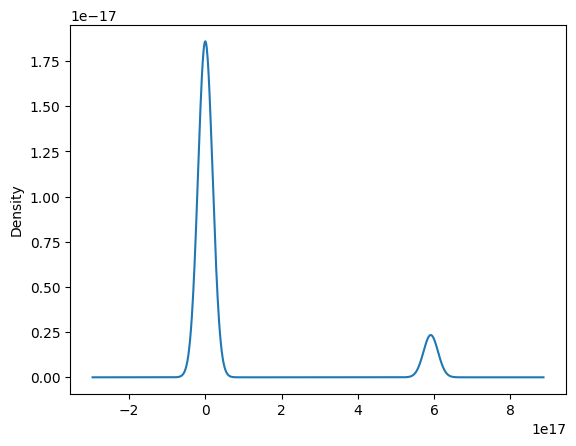

In [157]:
cleaned_df.salary.plot(kind='density')

In [158]:
cleaned_df.salary.skew()

2.4643595414739488

In [159]:
cleaned_df.salary.mean()

6.6062573403713384e+16

<Axes: xlabel='certifications', ylabel='salary'>

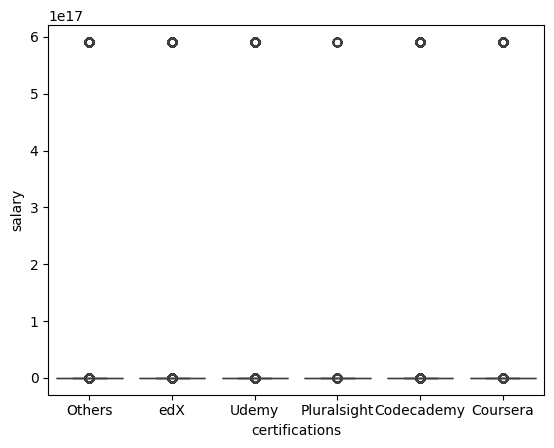

In [160]:
sb.boxplot(x='certifications', y = 'salary', data=cleaned_df)

In [161]:
print(cleaned_df['years_of_coding'].corr(cleaned_df['salary']))
print(cleaned_df['years_of_pro_coding'].corr(cleaned_df['salary']))
print(cleaned_df['years_of_work_exp'].corr(cleaned_df['salary']))

-0.29847215368807495
-0.008352337924390732
-0.011092305263749496


##### Correcting the outliers in the target variables

In [162]:
def outliers_corrector(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr

    df[col] = np.where(df[col] < lb, lb, df[col])
    df[col] = np.where(df[col] > ub, ub, df[col])
    return df

In [163]:
df = cleaned_df
col = 'salary'
cleaned = outliers_corrector(df, col)

In [164]:
cleaned.salary.astype('float').mean(axis=0)

156325.69937993362

<Axes: xlabel='salary'>

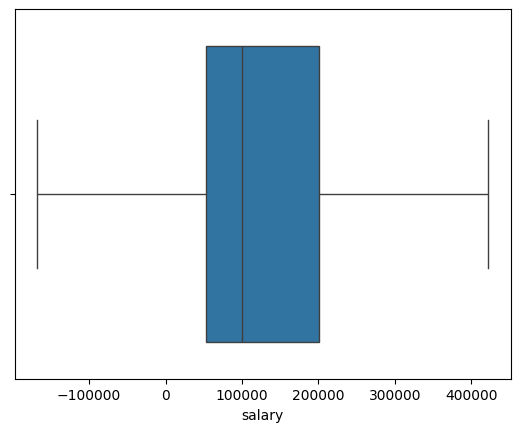

In [165]:
sb.boxplot(x='salary', data=cleaned)

In [166]:
cleaned.salary.max()

422182.5

In [167]:
cleaned.salary.min()

-167637.5

###### Select dataframe with salaries greater than or equal `$5000`

###### Let us assummed that the minimum yearly salary anyone should earn is $5000 so that we can remove unrealistic figures

In [168]:
salary_df = cleaned[cleaned['salary'] >= 5000]
salary_df.head(2)

,salary,highest_education,certifications,job_type,country,age_range,prog_lang,database,cloud_platform,webframe,...,collab_tool,aisearchtool,aidevtool,employment_status,work_option,org_size,industry,years_of_coding,years_of_pro_coding,years_of_work_exp
0,422182.5,below bachelor,Others,Others,Others,18-24,Others,Others,Others,Others,...,Others,Others,Others,Others,Hybrid,20 to 99 employees,Other,14.0,11.0,11.0
9,422182.5,Bachelor,edX,Developer_full-stack,India,25-34,HTML/CSS,Cloud Firestore,Amazon Web Services (AWS),Angular,...,Visual Studio Code,Bing_AI,AWS CodeWhisperer,Others,Hybrid,20 to 99 employees,Other,6.0,11.0,11.0


<Axes: ylabel='Density'>

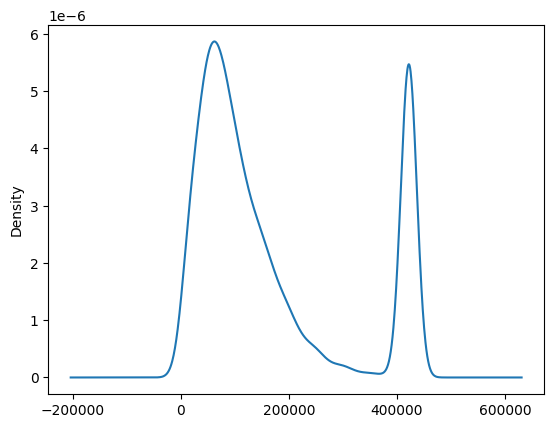

In [169]:
salary_df.salary.plot(kind='density')

In [170]:
salary_df.salary.min()

5000.0

In [171]:
salary_df.salary.max()

422182.5

In [172]:
salary_df.salary.value_counts()

salary
422182.5    17137
64254.0       784
53545.0       615
150000.0      585
200000.0      558
            ...  
159500.0        1
93380.0         1
34107.0         1
48092.0         1
16917.0         1
Name: count, Length: 9771, dtype: int64

###### Selecting features and target

In [173]:
targ = ['salary']
target_data = salary_df[targ]
target_df = target_data.reset_index(drop=True)
target_df.head()

,salary
0,422182.5
1,422182.5
2,113104.0
3,29008.0
4,60880.0


In [174]:
features = salary_df.drop(columns=targ)
features.head(2)

,highest_education,certifications,job_type,country,age_range,prog_lang,database,cloud_platform,webframe,tech_tool,collab_tool,aisearchtool,aidevtool,employment_status,work_option,org_size,industry,years_of_coding,years_of_pro_coding,years_of_work_exp
0,below bachelor,Others,Others,Others,18-24,Others,Others,Others,Others,Others,Others,Others,Others,Others,Hybrid,20 to 99 employees,Other,14.0,11.0,11.0
9,Bachelor,edX,Developer_full-stack,India,25-34,HTML/CSS,Cloud Firestore,Amazon Web Services (AWS),Angular,Docker,Visual Studio Code,Bing_AI,AWS CodeWhisperer,Others,Hybrid,20 to 99 employees,Other,6.0,11.0,11.0


###### Preprocessing Function for Features - Transforming and One Encoding

In [175]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
scaler = StandardScaler()
minmax = MinMaxScaler()
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform='pandas')

def features_preprocessing(df):
    
    num_data = df.select_dtypes(include=['int', 'float'])
    cat_data = df.select_dtypes(include=['object'])
    
    num = scaler.fit_transform(num_data)
    num = minmax.fit_transform(num)
    num_df = pd.DataFrame(num, columns=list(num_data.columns))
    
    cat = onehot.fit_transform(cat_data)
    cat_df = cat.reset_index(drop=True) 

    features = pd.concat([num_df, cat_df], axis=1)

    return features

In [176]:
df = features
feat_prep = features_preprocessing(df)
feat_prep.head()

,years_of_coding,years_of_pro_coding,years_of_work_exp,highest_education_Bachelor,highest_education_Master,highest_education_PhD,highest_education_below bachelor,certifications_Codecademy,certifications_Coursera,certifications_Others,...,industry_Healthcare,industry_Higher Education,"industry_Information Services, IT, Software Development, or other Technology",industry_Insurance,industry_Legal Services,"industry_Manufacturing, Transportation, or Supply Chain",industry_Oil & Gas,industry_Other,industry_Retail and Consumer Services,industry_Wholesale
0,0.267327,0.207921,0.22,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.108911,0.207921,0.22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.267327,0.049505,0.06,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.306931,0.168317,0.18,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.386139,0.188119,0.22,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


###### Train_Test_Split the dataset

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
seed = 42
test_size = 0.1

In [179]:
X_train, X_test, y_train, y_test = train_test_split(feat_prep, target_df, test_size=test_size, random_state=seed)

###### Train the Model

In [180]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [181]:
num_estimators = 100

rf_model = RandomForestRegressor(n_estimators=num_estimators, random_state=seed)
rf_model

RandomForestRegressor(random_state=42)

###### Fit the model

In [182]:
rf_model.fit(X_train, y_train)

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

###### Predict with the model

In [183]:
y_pred = rf_model.predict(X_test)
y_pred[:5]

array([422182.5 , 104692.12, 150398.44,  70029.81, 136785.75])

In [184]:
y_pred_df = pd.DataFrame(y_pred, columns=list(target_df.columns))
y_pred_df.head()

,salary
0,422182.50
1,104692.12
2,150398.44
3,70029.81
4,136785.75


###### Evaluate the Performance of the model

In [185]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [186]:
def evaluate_performance():
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'mse is: {round(mse, 2)}')
    print(f'rmse is: ${round(rmse, 2)}')
    print('mae is: ${:,.2f}'.format(mae))
    print(f'r2_score is: {round(r2, 2)*100}%')

In [187]:
evaluate_performance()

mse is: 1933103228.19
rmse is: $43967.07
mae is: $26,973.22
r2_score is: 90.0%


###### Another Model

In [188]:
num_estimators = 100

xgbr_model = XGBRegressor(n_estimators=num_estimators, random_state=seed)
xgbr_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

###### Fit the model

In [189]:
xgbr_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

###### Predict with the model

In [190]:
y_pred = xgbr_model.predict(X_test)
y_pred[:5]

array([415844.47 , 130011.55 , 206106.98 ,  69896.875, 169534.08 ],
      dtype=float32)

In [191]:
y_pred_df = pd.DataFrame(y_pred, columns=list(target_df.columns))
y_pred_df.head()

,salary
0,415844.468750
1,130011.546875
2,206106.984375
3,69896.875000
4,169534.078125


###### Evaluate the performance of the model

In [192]:
def evaluate_performance():
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'mse is: {round(mse, 2)}')
    print(f'rmse is: ${round(rmse, 2)}')
    print('mae is: ${:,.2f}'.format(mae))
    print(f'r2_score is: {round(r2, 2)*100}%')

In [193]:
evaluate_performance()

mse is: 1832606568.96
rmse is: $42808.95
mae is: $26,879.41
r2_score is: 91.0%


###### <font color = 'green'> Hyperparameterizing the Model

###### Define the cross validation techniques

In [194]:
from sklearn.model_selection import ShuffleSplit
num_splits = 5
cv = ShuffleSplit(n_splits=num_splits, test_size=test_size, random_state=seed)
cv

ShuffleSplit(n_splits=5, random_state=42, test_size=0.1, train_size=None)

###### Using GridSearchCV to parameterize the model

In [195]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

###### Instantiate the instance of the model

In [196]:
xgb = XGBRegressor()

###### Define the tunning paramaters for the model

In [197]:
seed = [0, 30, 42]
num_estimators = [60, 80, 100]
max_depth = [4, 6, 8]

###### Define the parameters grid

In [198]:
param_grid = {
    'random_state': seed,
    'n_estimators': num_estimators,
    'max_depth': max_depth
}

###### Instantiate the model with the GridSearchCV

In [199]:
xgb_gridCV = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=cv
)

xgb_gridCV

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.1, train_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, i...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [4, 6, 8], 'n_estimators': [60, 80, 100],
                         'random_state': [0, 30, 42]},
             scoring='neg_mean_squared_error')

###### Fit the model with gridsearchCV

In [200]:
%%time
xgb_gridCV.fit(X_train, y_train)

CPU times: total: 20min 3s
Wall time: 3min 11s


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size=0.1, train_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, i...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [4, 6, 8], 'n_estimators': [60, 80, 100],
                         'random_state': [0, 30, 42]},
             scoring='neg_mean_squared_error')

In [201]:
xgb_gridCV.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=80, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [202]:
xgb_gridCV.best_params_

{'max_depth': 6, 'n_estimators': 80, 'random_state': 0}

###### Grab the best model from the GridSearchCV

In [203]:
best_model = xgb_gridCV.best_estimator_

###### Predict with the best_model

In [204]:
y_pred = best_model.predict(X_test)
y_pred[:5]

array([415619.6 , 129878.06, 206248.52,  71432.56, 168822.81],
      dtype=float32)

In [205]:
y_pred_df = pd.DataFrame(y_pred, columns=list(target_df.columns))
y_pred_df.head()

,salary
0,415619.593750
1,129878.062500
2,206248.515625
3,71432.562500
4,168822.812500


###### Evaluate the Performance of the best model

In [206]:
evaluate_performance()

mse is: 1834748144.05
rmse is: $42833.96
mae is: $26,887.48
r2_score is: 91.0%


Clearly, even after hyperparameterizing, the model performance still stood at 91.0% and we are confident to interpret that 91.0% of the variations are explainable by the model leaving out less than 9% of the variations not explained every time the model is used to make predictions.

In [207]:
features.columns

Index(['highest_education', 'certifications', 'job_type', 'country',
       'age_range', 'prog_lang', 'database', 'cloud_platform', 'webframe',
       'tech_tool', 'collab_tool', 'aisearchtool', 'aidevtool',
       'employment_status', 'work_option', 'org_size', 'industry',
       'years_of_coding', 'years_of_pro_coding', 'years_of_work_exp'],
      dtype='object')

#### <font color = 'green'> Model Inferencing

In [208]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from xgboost import XGBRegressor
scaler
minmax
onehot
model = xgbr_model

def features_preprocessing_prediction(
    highest_education, certifications, job_type, country,
    age_range, prog_lang, database, cloud_platform, webframe,
    tech_tool, collab_tool, aisearchtool, aidevtool,
    employment_status, work_option, org_size, industry,
    years_of_coding, years_of_pro_coding, years_of_work_exp
):
    cols = [
        'highest_education', 'certifications', 'job_type', 'country',
       'age_range', 'prog_lang', 'database', 'cloud_platform', 'webframe',
       'tech_tool', 'collab_tool', 'aisearchtool', 'aidevtool',
       'employment_status', 'work_option', 'org_size', 'industry',
       'years_of_coding', 'years_of_pro_coding', 'years_of_work_exp'
    ]
    input_data = np.array([[
        highest_education, certifications, job_type, country,
        age_range, prog_lang, database, cloud_platform, webframe,
        tech_tool, collab_tool, aisearchtool, aidevtool,
        employment_status, work_option, org_size, industry,
        years_of_coding, years_of_pro_coding, years_of_work_exp
    ]])
    input_df = pd.DataFrame(input_data, columns=cols)

    # Convert the string columns to numeric
    input_df['years_of_coding'] = pd.to_numeric(input_df['years_of_coding'], downcast='float')
    input_df['years_of_pro_coding'] = pd.to_numeric(input_df['years_of_pro_coding'], downcast='float')
    input_df['years_of_work_exp'] = pd.to_numeric(input_df['years_of_work_exp'], downcast='float')
    
    
    num_data = input_df.select_dtypes(include=['int', 'float'])
    cat_data = input_df.select_dtypes(include=['object'])
    
    num = scaler.transform(num_data)
    num = minmax.transform(num)
    num_df = pd.DataFrame(num, columns=list(num_data.columns))
    
    cat = onehot.transform(cat_data)
    cat_df = cat.reset_index(drop=True) 

    features = pd.concat([num_df, cat_df], axis=1)
    predictions = model.predict(features)
    pred_df = pd.DataFrame(predictions, columns=['Estimated_Salary'])
    in_out_df = pd.concat([input_df, pred_df], axis=1)
    pred = predictions[0]

    return pred

In [209]:
# Accessing data for sample test of the model
feat = features.values
feat

sample = feat[0, :]
sample

# Defining all the input parameters to be equals to the sample accessed
highest_education, certifications, job_type, country, age_range, prog_lang, database, cloud_platform, webframe, tech_tool, collab_tool, aisearchtool, aidevtool, employment_status, work_option, org_size, industry, years_of_coding, years_of_pro_coding, years_of_work_exp = sample

# Using the function to make predictions
pred = features_preprocessing_prediction(
    highest_education, certifications, job_type, country,
    age_range, prog_lang, database, cloud_platform, webframe,
    tech_tool, collab_tool, aisearchtool, aidevtool,
    employment_status, work_option, org_size, industry,
    years_of_coding, years_of_pro_coding, years_of_work_exp
)
print('The predicted salary is: ', pred)

y = y_test.values
print('The ground truth or actual salary is: ', y[0][0])

The predicted salary is:  424558.5
The ground truth or actual salary is:  422182.5


###### Saving the choice model and the preprocessing steps

In [210]:
import pickle

In [211]:
os.chdir(model_path)

In [212]:
model_and_prep = {'model': xgbr_model, 'scaler': scaler, 'min_max': minmax, 'onehot': onehot}
with open('model_preprocessing_steps_stackoverflow.pkl', 'wb') as file:
    pickle.dump(model_and_prep, file)

In [213]:
os.chdir(note_path)

##### <font color = 'green'> Productionalizing the Salary Prediction Model for Developers and Tech Professionals

###### Load the saved choice model and the preprocessing steps

In [214]:
os.chdir(model_path)

In [215]:
with open('model_preprocessing_steps_stackoverflow.pkl', 'rb') as file:
    inference = pickle.load(file)

In [216]:
os.chdir(note_path)

###### Access the loaded model and its artifact

In [217]:
inference_model = inference['model']
inference_scaler = inference['scaler']
inference_minmax = inference['min_max']
inference_onehot = inference['onehot']

##### <font color = 'purple'> Productionalizing with Gradio Interface

###### Define the function for preprocessing and inferencing

In [218]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from xgboost import XGBRegressor
model = inference_model
inference_scaler
inference_minmax
inference_onehot

def prep_prediction_inference(
    highest_education, certifications, job_type, country,
    age_range, prog_lang, database, cloud_platform, webframe,
    tech_tool, collab_tool, aisearchtool, aidevtool,
    employment_status, work_option, org_size, industry,
    years_of_coding, years_of_pro_coding, years_of_work_exp
):
    cols = [
        'highest_education', 'certifications', 'job_type', 'country',
       'age_range', 'prog_lang', 'database', 'cloud_platform', 'webframe',
       'tech_tool', 'collab_tool', 'aisearchtool', 'aidevtool',
       'employment_status', 'work_option', 'org_size', 'industry',
       'years_of_coding', 'years_of_pro_coding', 'years_of_work_exp'
    ]
    input_data = np.array([[
        highest_education, certifications, job_type, country,
        age_range, prog_lang, database, cloud_platform, webframe,
        tech_tool, collab_tool, aisearchtool, aidevtool,
        employment_status, work_option, org_size, industry,
        years_of_coding, years_of_pro_coding, years_of_work_exp
    ]])
    input_df = pd.DataFrame(input_data, columns=cols)

    # Convert the string columns to numeric
    input_df['years_of_coding'] = pd.to_numeric(input_df['years_of_coding'], downcast='float')
    input_df['years_of_pro_coding'] = pd.to_numeric(input_df['years_of_pro_coding'], downcast='float')
    input_df['years_of_work_exp'] = pd.to_numeric(input_df['years_of_work_exp'], downcast='float')
    
    
    num_data = input_df.select_dtypes(include=['int', 'float'])
    cat_data = input_df.select_dtypes(include=['object'])
    
    num = inference_scaler.transform(num_data)
    num = inference_minmax.transform(num)
    num_df = pd.DataFrame(num, columns=list(num_data.columns))
    
    cat = inference_onehot.transform(cat_data)
    cat_df = cat.reset_index(drop=True) 

    features = pd.concat([num_df, cat_df], axis=1)
    predictions = model.predict(features)
    salary = pd.DataFrame({'estimated_salary': [predictions[0]]})

    return round(salary)

###### Install the gradio
`!pip install gradio`

###### Import gradio

In [219]:
import gradio as gr

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [220]:
features.columns

Index(['highest_education', 'certifications', 'job_type', 'country',
       'age_range', 'prog_lang', 'database', 'cloud_platform', 'webframe',
       'tech_tool', 'collab_tool', 'aisearchtool', 'aidevtool',
       'employment_status', 'work_option', 'org_size', 'industry',
       'years_of_coding', 'years_of_pro_coding', 'years_of_work_exp'],
      dtype='object')

###### Generate sample data points to be used in the gradio interface - Optional

In [221]:
feat = features.values

sample = [list(data) for data in feat[10:13, :]]
print('total sample points: ',len(sample[0]))
print('total sample data: ',len(sample))

total sample points:  20
total sample data:  3


In [222]:
sample_data = sample

inputs=[
        gr.Textbox(label='highest_education'),
        gr.Textbox(label='certifications'),
        gr.Textbox(label='job_type'),
        gr.Textbox(label='country'),
        gr.Textbox(label='age_range'),
        gr.Textbox(label='prog_lang'),
        gr.Textbox(label='database'),
        gr.Textbox(label='cloud_platform'),
        gr.Textbox(label='webframe'),
        gr.Textbox(label='tech_tool'),
        gr.Textbox(label='collab_tool'),
        gr.Textbox(label='aisearchtool'),
        gr.Textbox(label='aidevtool'),
        gr.Textbox(label='employment_status'),
        gr.Textbox(label='work_option'),
        gr.Textbox(label='org_size'),
        gr.Textbox(label='industry'),
        gr.Number(label='years_of_coding'),
        gr.Number(label='years_of_pro_coding'),
        gr.Number(label='years_of_work_exp')
    ]

outputs = [gr.Dataframe(row_count = (1, "dynamic"), col_count=(1, "fixed"), label="Developers and Tech Professionals Salary", headers=['estimated_salary'])]

title='StackOverFlow Developers and Tech Professionals Salary Predicition Model by Olanrewaju Adegoke'
description='You can supply the inputs or select the sample data points to determine the salaries of your desired role.'

interface = gr.Interface(fn = prep_prediction_inference, inputs = inputs, outputs = outputs, title=title, description=description, examples=sample_data)

interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://13d9d562a1ff3d4e0b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


##### <font color = 'purple'> Productionalizing and deployment with `Streamlit`

##### Proceed to VSCode to complete!!!!